In [5]:
import matplotlib.pyplot as plt
import re
import seaborn as sns

## 读取loss日志

In [6]:
def read_log_data(filepath):
    """读取日志文件并返回内容."""
    with open(filepath, 'r') as file:
        return file.read()

# log_path='../logs_pretrained/epoch-20-vit-large-pretrained.out'
log_path='../logs_pretrained/vit_large_16.out'

log_data = read_log_data(log_path)

no_bablance_log='../logs_pretrained/no_augumentation.out'
no_banlance_log_data = read_log_data(no_bablance_log)


## 从文件提取loss函数

In [7]:

def extract_losses(log_data):
    """使用正则表达式从日志数据中提取训练和测试损失."""
    train_pattern = r"\[Train #(\d+)\] Loss: ([\d\.]+)"
    test_pattern = r"\[Test #(\d+)\] Loss: ([\d\.]+)"

    train_matches = re.findall(train_pattern, log_data)
    test_matches = re.findall(test_pattern, log_data)

    train_epochs = [int(epoch)+1 for epoch, loss in train_matches]
    test_epochs = [int(epoch)+1 for epoch, loss in test_matches]

    train_losses = [float(loss) for epoch, loss in train_matches]
    test_losses = [float(loss) for epoch, loss in test_matches]
    print("training loss size is ", len(train_losses))
    print("testing loss size is ", len(test_losses))
    return train_epochs, train_losses, test_epochs, test_losses


## 绘制loss 函数

In [13]:

def plot_losses(train_epochs, train_losses, test_epochs, test_losses,savepath,title):
    """绘制训练和测试损失的图表."""
    sns.set_theme(style="whitegrid")
    # 设置字体属性
    font_dict = {'family': 'Times New Roman', 'size': 15}
    plt.figure(figsize=(7, 5))
    font_dict={'family':'Times New Roman','size':15}



    # train_epochs = [int(epoch)+1 for epoch in train_epochs]
    # test_epochs = [int(epoch)+1 for epoch in test_epochs]

    sns.lineplot(x=train_epochs, y=train_losses,label="training loss",  linewidth=2.5, linestyle='-', marker='o', markersize=8, color='blue')  # 使用 seaborn 的 lineplot
    sns.lineplot(x=test_epochs, y=test_losses,label="validating loss", linewidth=2.5,linestyle='--', marker='s', markersize=8, color='orange')  # 使用 seaborn 的 lineplot
    plt.title(title,fontdict=font_dict)

    plt.xlabel('Epoch',fontdict=font_dict)
    plt.ylabel('Loss',fontdict=font_dict)
    plt.legend(prop=font_dict)
    plt.tick_params(axis='both', labelsize=font_dict['size'])  # 设置坐标轴刻度标签的字体属性
    plt.savefig(savepath,dpi=400,bbox_inches='tight')
    plt.show()



## 绘制loss

training loss size is  10
testing loss size is  10
train_epochs [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


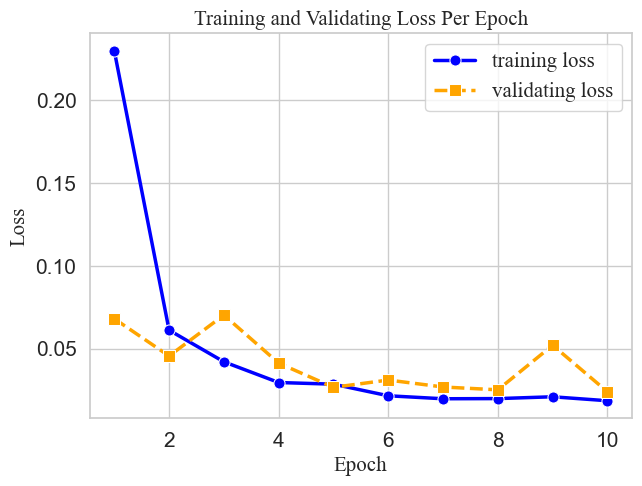

In [20]:

save_path='../figs/vit_large_16_loss.png'
title='Training and Validating Loss Per Epoch'
# 提取loss
train_epochs, train_losses, test_epochs, test_losses = extract_losses(log_data)
print("train_epochs",train_epochs)
plot_losses(train_epochs[:10], train_losses[:10], test_epochs[:10], test_losses[:10],save_path,title)


## 绘制 accuracy

In [23]:
def parse_and_plot(data,title,savepath):
    # Define the pattern to extract epoch number and accuracies from the training and testing data
    pattern = r'\[Train #(\d+)\] Loss: [\d.]+ Acc: ([\d.]+)% Time: [\d.]+s\n\[Test #\d+\] Loss: [\d.]+ Acc: ([\d.]+)% Time: [\d.]+s'
    
    # Initialize lists to store epochs, training accuracies, and testing accuracies
    epochs = []
    train_accs = []
    test_accs = []
    
    # Use regular expression to find all matches in the input data
    for match in re.finditer(pattern, data):
        epoch = int(match.group(1))
        train_acc = float(match.group(2))
        test_acc = float(match.group(3))
        
        # Append the results to the respective lists
        epochs.append(epoch)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
    epochs = [epoch+1 for epoch in epochs]
    
    sns.set_theme(style="whitegrid")
    # 设置字体属性
    font_dict = {'family': 'Times New Roman', 'size': 15}
    # 创建图形并设置尺寸
    plt.figure(figsize=(7, 5))
    # 绘制训练准确率线条
    sns.lineplot(x=epochs[:10], y=train_accs[:10], label="Training Accuracy", linewidth=2.5, linestyle='-', marker='o', markersize=8, color='blue')
    # 绘制验证准确率线条
    sns.lineplot(x=epochs[:10], y=test_accs[:10], label="Validating Accuracy", linewidth=2.5, linestyle='--', marker='s', markersize=8, color='orange')
    # 设置标题和轴标签
    plt.title(title, fontdict=font_dict)
    plt.xlabel('Epoch', fontdict=font_dict)
    plt.ylabel('Accuracy', fontdict=font_dict)
    plt.tick_params(axis='both', labelsize=font_dict['size'])  # 设置坐标轴刻度标签的字体属性
    plt.savefig(savepath,dpi=400,bbox_inches='tight')
    plt.show()


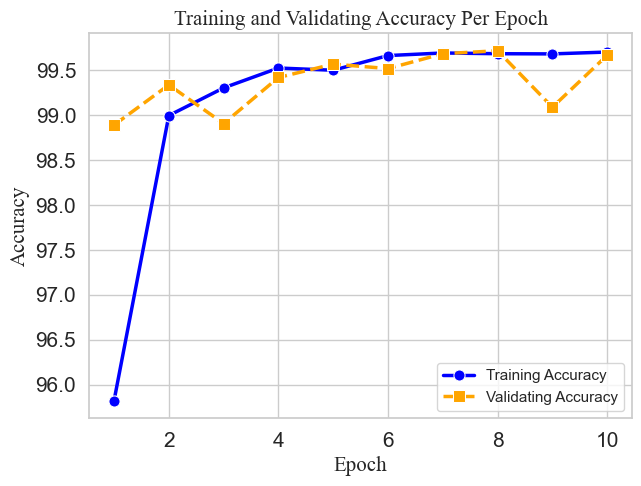

In [18]:

# main_acc(log_path,savepath="../figs/acc_no.png",title='Training and Validating Accuracy Per Epoch')
title='Training and Validating Accuracy Per Epoch'
save_path='../figs/vit_large_16_acc.png'
parse_and_plot(log_data,title,save_path)

##  绘制普通loss

training loss size is  20
testing loss size is  20


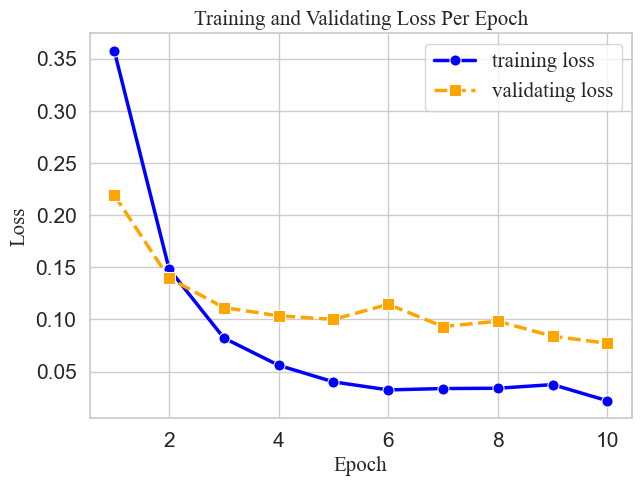

In [22]:

save_path='../figs/no_banlance_vit_large_16_loss.png'
title='Training and Validating Loss Per Epoch'
# 提取loss
train_epochs, train_losses, test_epochs, test_losses = extract_losses(no_banlance_log_data)
plot_losses(train_epochs[:10], train_losses[:10], test_epochs[:10], test_losses[:10],save_path,title)


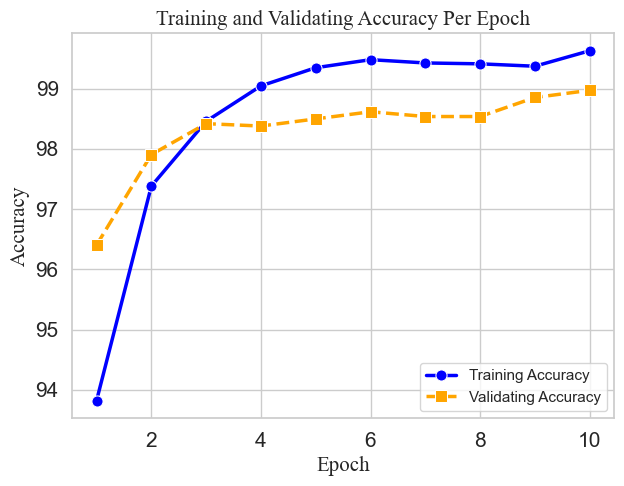

In [24]:
# main_acc(log_path,savepath="../figs/acc_no.png",title='Training and Validating Accuracy Per Epoch')
title='Training and Validating Accuracy Per Epoch'
save_path='../figs/no_banlance_vit_large_16_acc.png'
parse_and_plot(no_banlance_log_data,title,save_path)

